In [5]:
# in this notebook, we are testing out some new math to make the model a bit more self-consistent and logical
# and making sure it still runs to steady state in a reasonable time when those changes are made
# see notes from 3/8/23 in red, gridded notebook for details on changes
# and/or compare to "default.ipynb"

In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [7]:
# create a profile
dx = 500
x = np.arange(0, 50000, dx)
x_node = x + (dx/2)

# add some elevation
Hstar = 0.5 # depth decay
etab = np.zeros(len(x)) # bedrock elevation
etab[:] = np.linspace(1, 0.1, len(x)) # need to start with slight bedrock slope
H = Hstar + np.zeros(len(x)) # alluvium thickness
eta = etab + H # topography

In [8]:
# define constants and other parameters
K = 1e-6 # erodibility
beta = 0.0005 # abradability
r = 5. # runoff rate
U = 0.0001 # uplift or baselevel fall rate
I = 0.01 # intermittency
phi = 0.1 # porosity
D = 0.01 # grain size
gamma = 0.5 # fraction plucked that becomes coarse

kqs = 0.041 # sed transport coeff
kxb = 25 # valley width coeff
Pxb = 1./5. # valley width exp
kb = 8.3e-8 # channel width coeff

B_valley = kxb * (x_node**Pxb) # valley width
# Q = (r * kxb * x_node**(1 + Pxb))/(1 + Pxb) # discharge
A = (1./3.) * (x**2)
Q = r * A

In [9]:
def model(x, dx, x_node,
          K, beta, gamma,
          D, phi, Hstar,
          kb, kqs, I, r, U,
          etab, H, eta,
          B_valley, Q,
          num_steps = 1):
    
    q = Q/B_valley
    dt = 35
    
    run_duration = dt * num_steps
    cum_time = 0.0
    
    Qs = np.zeros(len(x))
    qs = np.zeros(len(x))
    Eb_p = np.zeros(len(x))
    Eb_a = np.zeros(len(x))
    Eb = np.zeros(len(x))
    Eh = np.zeros(len(x))
    E = np.zeros(len(x))
    ql = np.zeros(len(x)) # lateral sediment supply
    
    H[-1] = 0
    E[-1] = U
    q[0] = 0
    Qs[0] = 0
    
    while cum_time < run_duration:
        
        # drop baselevel
        eta[-1] -= U * dt
        
        # set boundary conditions
        etab[-1] = eta[-1]
        
        # calc slope
        S = -np.diff(eta)/dx
        
        # calc bed exposure
        alpha = np.exp(-H/Hstar)
        
        # calc sed transport
        # Qs[1:] = kqs * I * Q[1:] * S**(7./6.) * (1 - alpha[:-1])
        Qs[0] = 0.01
        # qs[1:] = Qs[1:] / B_valley[1:]
        
        # calc bedrock erosion
        Eb_p[:-1] = K * Q[1:] * S**(7./6.) * alpha[:-1] * I
        Eb_a[:-1] = beta * Qs[1:] * alpha[:-1]
        Eb[:-1] = (Eb_p[:-1] + Eb_a[:-1]) / B_valley[:-1]
        
        # calc lateral flux
        ql[:-1] = ((Eb[:-1] * gamma)/beta) * (1 - np.exp(-beta * x[1:]/3))
        
        # calc grain attrition
        atr = Qs * beta
        
        # calc sediment erosion rate
        Eh[:-1] = 1/((1 - phi) * B_valley[:-1]) * (np.diff(Qs)/dx + atr[1:]) # - (Eb_p[:-1]*gamma) - ql[:-1])
        
        # calc total erosion rate
        E[:-1] = Eb[:-1] + Eh[:-1]
        
        # update topography
        etab[:-1] -= Eb[:-1] * dt
        H[:-1] -= Eh[:-1] * dt
        H[H<0] = 0
        eta[:-1] = etab[:-1] + H[:-1]
        
        # update elapsed time
        cum_time += dt
        
    print(cum_time)
        
    return (dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta)

In [10]:
#now write a test
num_steps = 5000000

test_run = [x, dx, x_node, 
            K, beta, gamma,
            D, phi, Hstar,
            kb, kqs, I, r, U,
            etab, H, eta,
            B_valley, Q,
            num_steps]

# and run it
(dt, S, q, alpha, Qs, qs, Eb_p, Eb_a, Eb, ql, atr, Eh, E, etab, H, eta) = model(*test_run)

175000000.0


In [11]:
Eb

array([1.73578201e-48, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
      

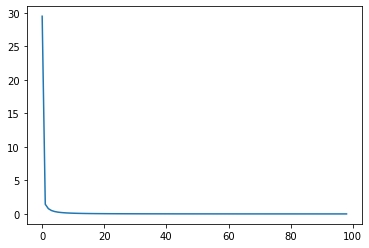

In [12]:
plt.plot(S)

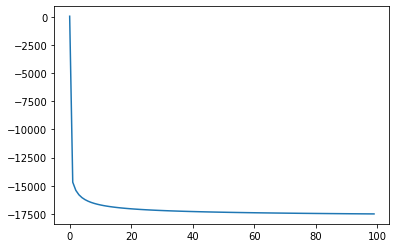

In [13]:
plt.plot(eta)

In [14]:
S[-1]

0.0036763761017573416

In [15]:
eta

array([    53.04618427, -14684.97389348, -15405.8864174 , -15798.57028042,
       -16052.61658607, -16233.53880827, -16370.53000656, -16478.76407828,
       -16566.99141251, -16640.65138889, -16703.32301526, -16757.46863613,
       -16804.84435803, -16846.74025179, -16884.12784453, -16917.75438058,
       -16948.20513778, -16975.94583956, -17001.35225717, -17024.73133234,
       -17046.3365464 , -17066.37929877, -17085.03746319, -17102.46191244,
       -17118.7815575 , -17134.10728466, -17148.53506414, -17162.14842862,
       -17175.02046702, -17187.21544156, -17198.79010953, -17209.79481118,
       -17220.27437123, -17230.26885044, -17239.81417593, -17248.94267254,
       -17257.68351326, -17266.06310267, -17274.10540507, -17281.83222622,
       -17289.26345653, -17296.41728151, -17303.31036475, -17309.95800744,
       -17316.374288  , -17322.57218458, -17328.56368296, -17334.35987179,
       -17339.97102689, -17345.40668612, -17350.67571597, -17355.786371  ,
       -17360.74634693, -

In [16]:
eta_adj = eta - eta[-1]

In [17]:
eta_adj

array([1.75524462e+04, 2.81442611e+03, 2.09351358e+03, 1.70082972e+03,
       1.44678341e+03, 1.26586119e+03, 1.12886999e+03, 1.02063592e+03,
       9.32408588e+02, 8.58748612e+02, 7.96076986e+02, 7.41931365e+02,
       6.94555643e+02, 6.52659749e+02, 6.15272156e+02, 5.81645620e+02,
       5.51194863e+02, 5.23454161e+02, 4.98047744e+02, 4.74668669e+02,
       4.53063455e+02, 4.33020702e+02, 4.14362538e+02, 3.96938089e+02,
       3.80618443e+02, 3.65292716e+02, 3.50864937e+02, 3.37251572e+02,
       3.24379534e+02, 3.12184559e+02, 3.00609891e+02, 2.89605190e+02,
       2.79125630e+02, 2.69131151e+02, 2.59585825e+02, 2.50457328e+02,
       2.41716488e+02, 2.33336898e+02, 2.25294596e+02, 2.17567775e+02,
       2.10136544e+02, 2.02982719e+02, 1.96089636e+02, 1.89441994e+02,
       1.83025713e+02, 1.76827816e+02, 1.70836318e+02, 1.65040129e+02,
       1.59428974e+02, 1.53993315e+02, 1.48724285e+02, 1.43613630e+02,
       1.38653654e+02, 1.33837173e+02, 1.29157470e+02, 1.24608260e+02,
      

In [18]:
ql

array([1.38785467e-46, 1.53518275e-02, 2.21199217e-02, 2.83468689e-02,
       3.40759370e-02, 3.93469340e-02, 4.41964854e-02, 4.86582881e-02,
       5.27633447e-02, 5.65401791e-02, 6.00150346e-02, 6.32120559e-02,
       6.61534575e-02, 6.88596776e-02, 7.13495203e-02, 7.36402862e-02,
       7.57478925e-02, 7.76869840e-02, 7.94710342e-02, 8.11124397e-02,
       8.26226057e-02, 8.40120254e-02, 8.52903533e-02, 8.64664717e-02,
       8.75485529e-02, 8.85441156e-02, 8.94600775e-02, 9.03028032e-02,
       9.10781483e-02, 9.17915001e-02, 9.24478155e-02, 9.30516549e-02,
       9.36072139e-02, 9.41183528e-02, 9.45886234e-02, 9.50212932e-02,
       9.54193686e-02, 9.57856156e-02, 9.61225792e-02, 9.64326007e-02,
       9.67178342e-02, 9.69802617e-02, 9.72217066e-02, 9.74438467e-02,
       9.76482254e-02, 9.78362629e-02, 9.80092658e-02, 9.81684361e-02,
       9.83148799e-02, 9.84496146e-02, 9.85735766e-02, 9.86876271e-02,
       9.87925587e-02, 9.88891003e-02, 9.89779230e-02, 9.90596437e-02,
      

In [19]:
Eb

array([1.73578201e-48, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
       1.00000000e-04, 1.00000000e-04, 1.00000000e-04, 1.00000000e-04,
      

In [20]:
ql/B_valley

array([1.83999219e-48, 1.63383359e-04, 2.12550227e-04, 2.54658090e-04,
       2.91119498e-04, 3.22926994e-04, 3.50809264e-04, 3.75327653e-04,
       3.96930548e-04, 4.15985746e-04, 4.32800936e-04, 4.47637372e-04,
       4.60719437e-04, 4.72241578e-04, 4.82373507e-04, 4.91264202e-04,
       4.99045054e-04, 5.05832398e-04, 5.11729566e-04, 5.16828593e-04,
       5.21211639e-04, 5.24952192e-04, 5.28116091e-04, 5.30762408e-04,
       5.32944206e-04, 5.34709203e-04, 5.36100344e-04, 5.37156312e-04,
       5.37911973e-04, 5.38398765e-04, 5.38645054e-04, 5.38676440e-04,
       5.38516032e-04, 5.38184700e-04, 5.37701287e-04, 5.37082815e-04,
       5.36344654e-04, 5.35500686e-04, 5.34563449e-04, 5.33544258e-04,
       5.32453331e-04, 5.31299886e-04, 5.30092238e-04, 5.28837884e-04,
       5.27543581e-04, 5.26215416e-04, 5.24858863e-04, 5.23478852e-04,
       5.22079807e-04, 5.20665703e-04, 5.19240105e-04, 5.17806206e-04,
       5.16366862e-04, 5.14924623e-04, 5.13481766e-04, 5.12040314e-04,
      

In [21]:
# calc width

b = (kb * Q[1:] * S**(7/6)) / (D**(3/2))

In [18]:
# save csv files

# np.savetxt('elevation csv files/eta_default.csv', eta_adj, delimiter = ',')
# np.savetxt('alpha csv files/alpha_default.csv', alpha, delimiter = ',')
# np.savetxt('slope csv files/slope_default.csv', S, delimiter = ',')
# np.savetxt('width csv files/b_default.csv', b, delimiter = ',')
# np.savetxt('Qs csv files/Qs_default.csv', Qs, delimiter = ',')